In [ ]:
import numpy as np

class Graph():

  def __init__(self):
    self.nodes = {}
    self.adj_list = {}

  def get_nodes_names(self):
    return list(self.nodes.keys())

  def add_node(self, n):
    self.nodes[n] = len(self.nodes)
    self.adj_list[n] = {}

  def add_edge(self, a, b, d=1, dir=False):
    if a not in self.get_nodes_names(): self.add_node(a)
    if b not in self.get_nodes_names(): self.add_node(b)
    self.adj_list[a][b] = d
    if not dir: self.adj_list[b][a] = d

  @staticmethod
  def floyd_washall_reduction(dm):
    distance_matrix = np.copy(dm)
    n = distance_matrix.shape[0]
    for i in range(n):
      distance_matrix[i][i] = 0
    for k in range(n):
      for j in range(n):
        for i in range(n):
          distance_matrix[i][j] = min(
              distance_matrix[i][j],
              distance_matrix[i][k] + distance_matrix[k][j]
          )
    return distance_matrix

  def as_distance_matrix(self, fw=False):
    n = len(self.nodes)
    distance_matrix = np.full((n,n), np.inf)
    for node_a, neighbors in self.adj_list.items():
      for node_b, distance in neighbors.items():
        distance_matrix[self.nodes[node_a]][self.nodes[node_b]] = distance
    if fw: distance_matrix = Graph.floyd_washall_reduction(distance_matrix)
    return distance_matrix

  @staticmethod
  def from_edge_list(edge_list, dir=False):
    g = Graph()
    for a, b, d in edge_list:
      g.add_edge(a, b, d, dir=dir)
    return g


In [ ]:
with open("test.txt") as f:
  g = Graph.from_edge_list([line.split() for line in f.readlines()])
g

In [ ]:
Graph.floyd_washall_reduction(g.as_distance_matrix())

array([[0., 1., 3., 4.],
       [1., 0., 2., 5.],
       [3., 2., 0., 3.],
       [4., 5., 3., 0.]])

In [ ]:
import networkx as nx
with open("test.txt") as f:
  gx = nx.read_weighted_edgelist(f)
gx

In [ ]:
nx.floyd_warshall_numpy(gx)

array([[0., 1., 3., 4.],
       [1., 0., 2., 5.],
       [3., 2., 0., 3.],
       [4., 5., 3., 0.]])

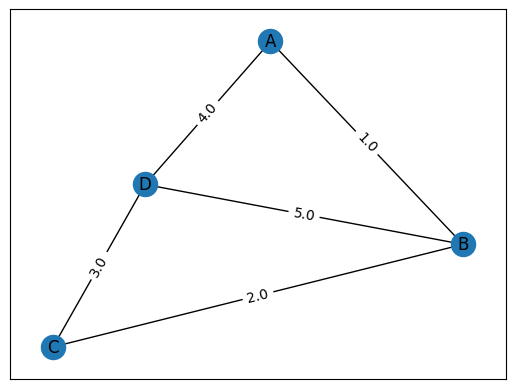

In [ ]:
pos = nx.spring_layout(gx)
labels = nx.get_edge_attributes(gx, 'weight')
nx.draw_networkx(gx, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(gx, pos, edge_labels=labels)
print()